In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
sns.set()

warnings.filterwarnings('ignore')

%matplotlib inline
color = sns.color_palette()

# Upload data

In [374]:
data = pd.read_csv('data/fixed_data/data.csv')
print(data.shape)
data.head()

(307511, 119)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Info

In [375]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 119 columns):
SK_ID_CURR                      float64
TARGET                          float64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    float64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      float64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 float64
OWN_CAR_AGE                     float64
FLAG_MOBIL       

# Fast statistical info

In [376]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# Numeric and Categorical data

In [377]:
# К-во уникальных значений во всех категориальных переменных
cols = data.columns
num_cols = data._get_numeric_data().columns
print(num_cols)

# Get categorical
categorical = list(set(cols) - set(num_cols))
print(categorical, len(categorical))

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=103)
['FLAG_OWN_CAR', 'HOUSETYPE_MODE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE', 'WALLSMATERIAL_MODE', 'NAME_CONTRACT_TYPE', 'FONDKAPREMONT_MODE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'CODE_GENDER', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS'] 16


# Make correlation analysis

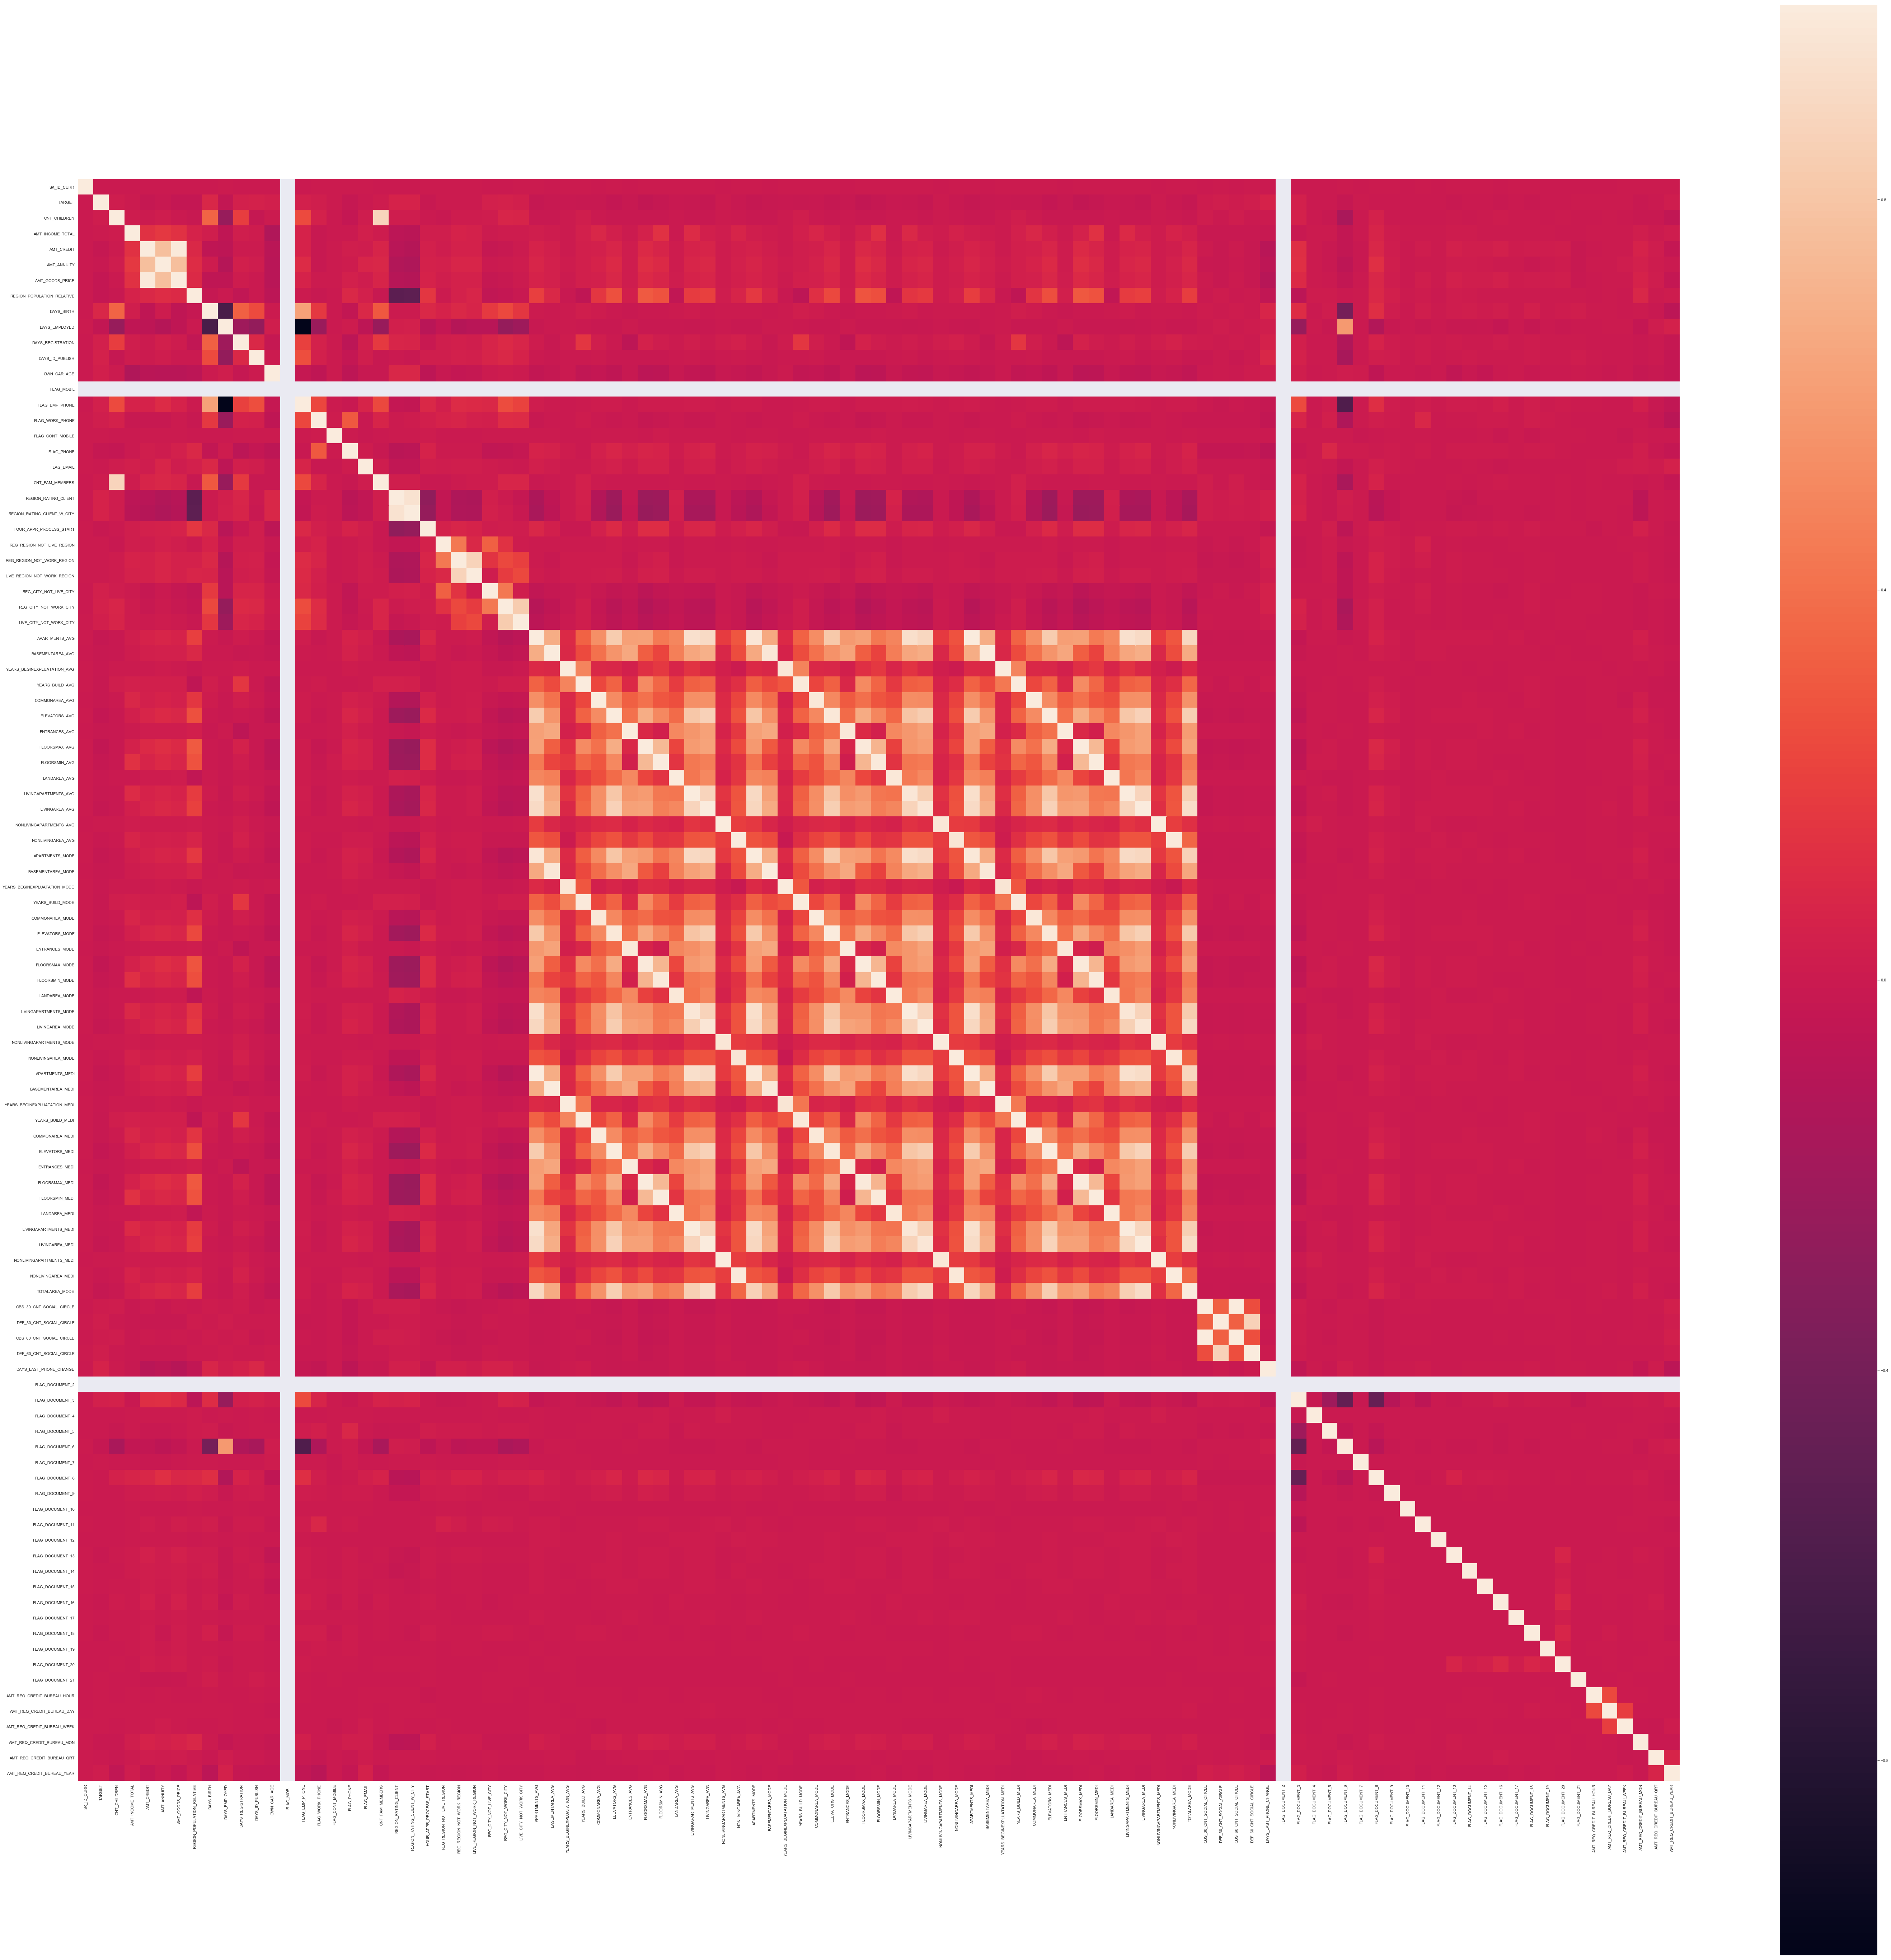

In [6]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(100, 100))
sns.heatmap(corrmat, square=True)
plt.show()

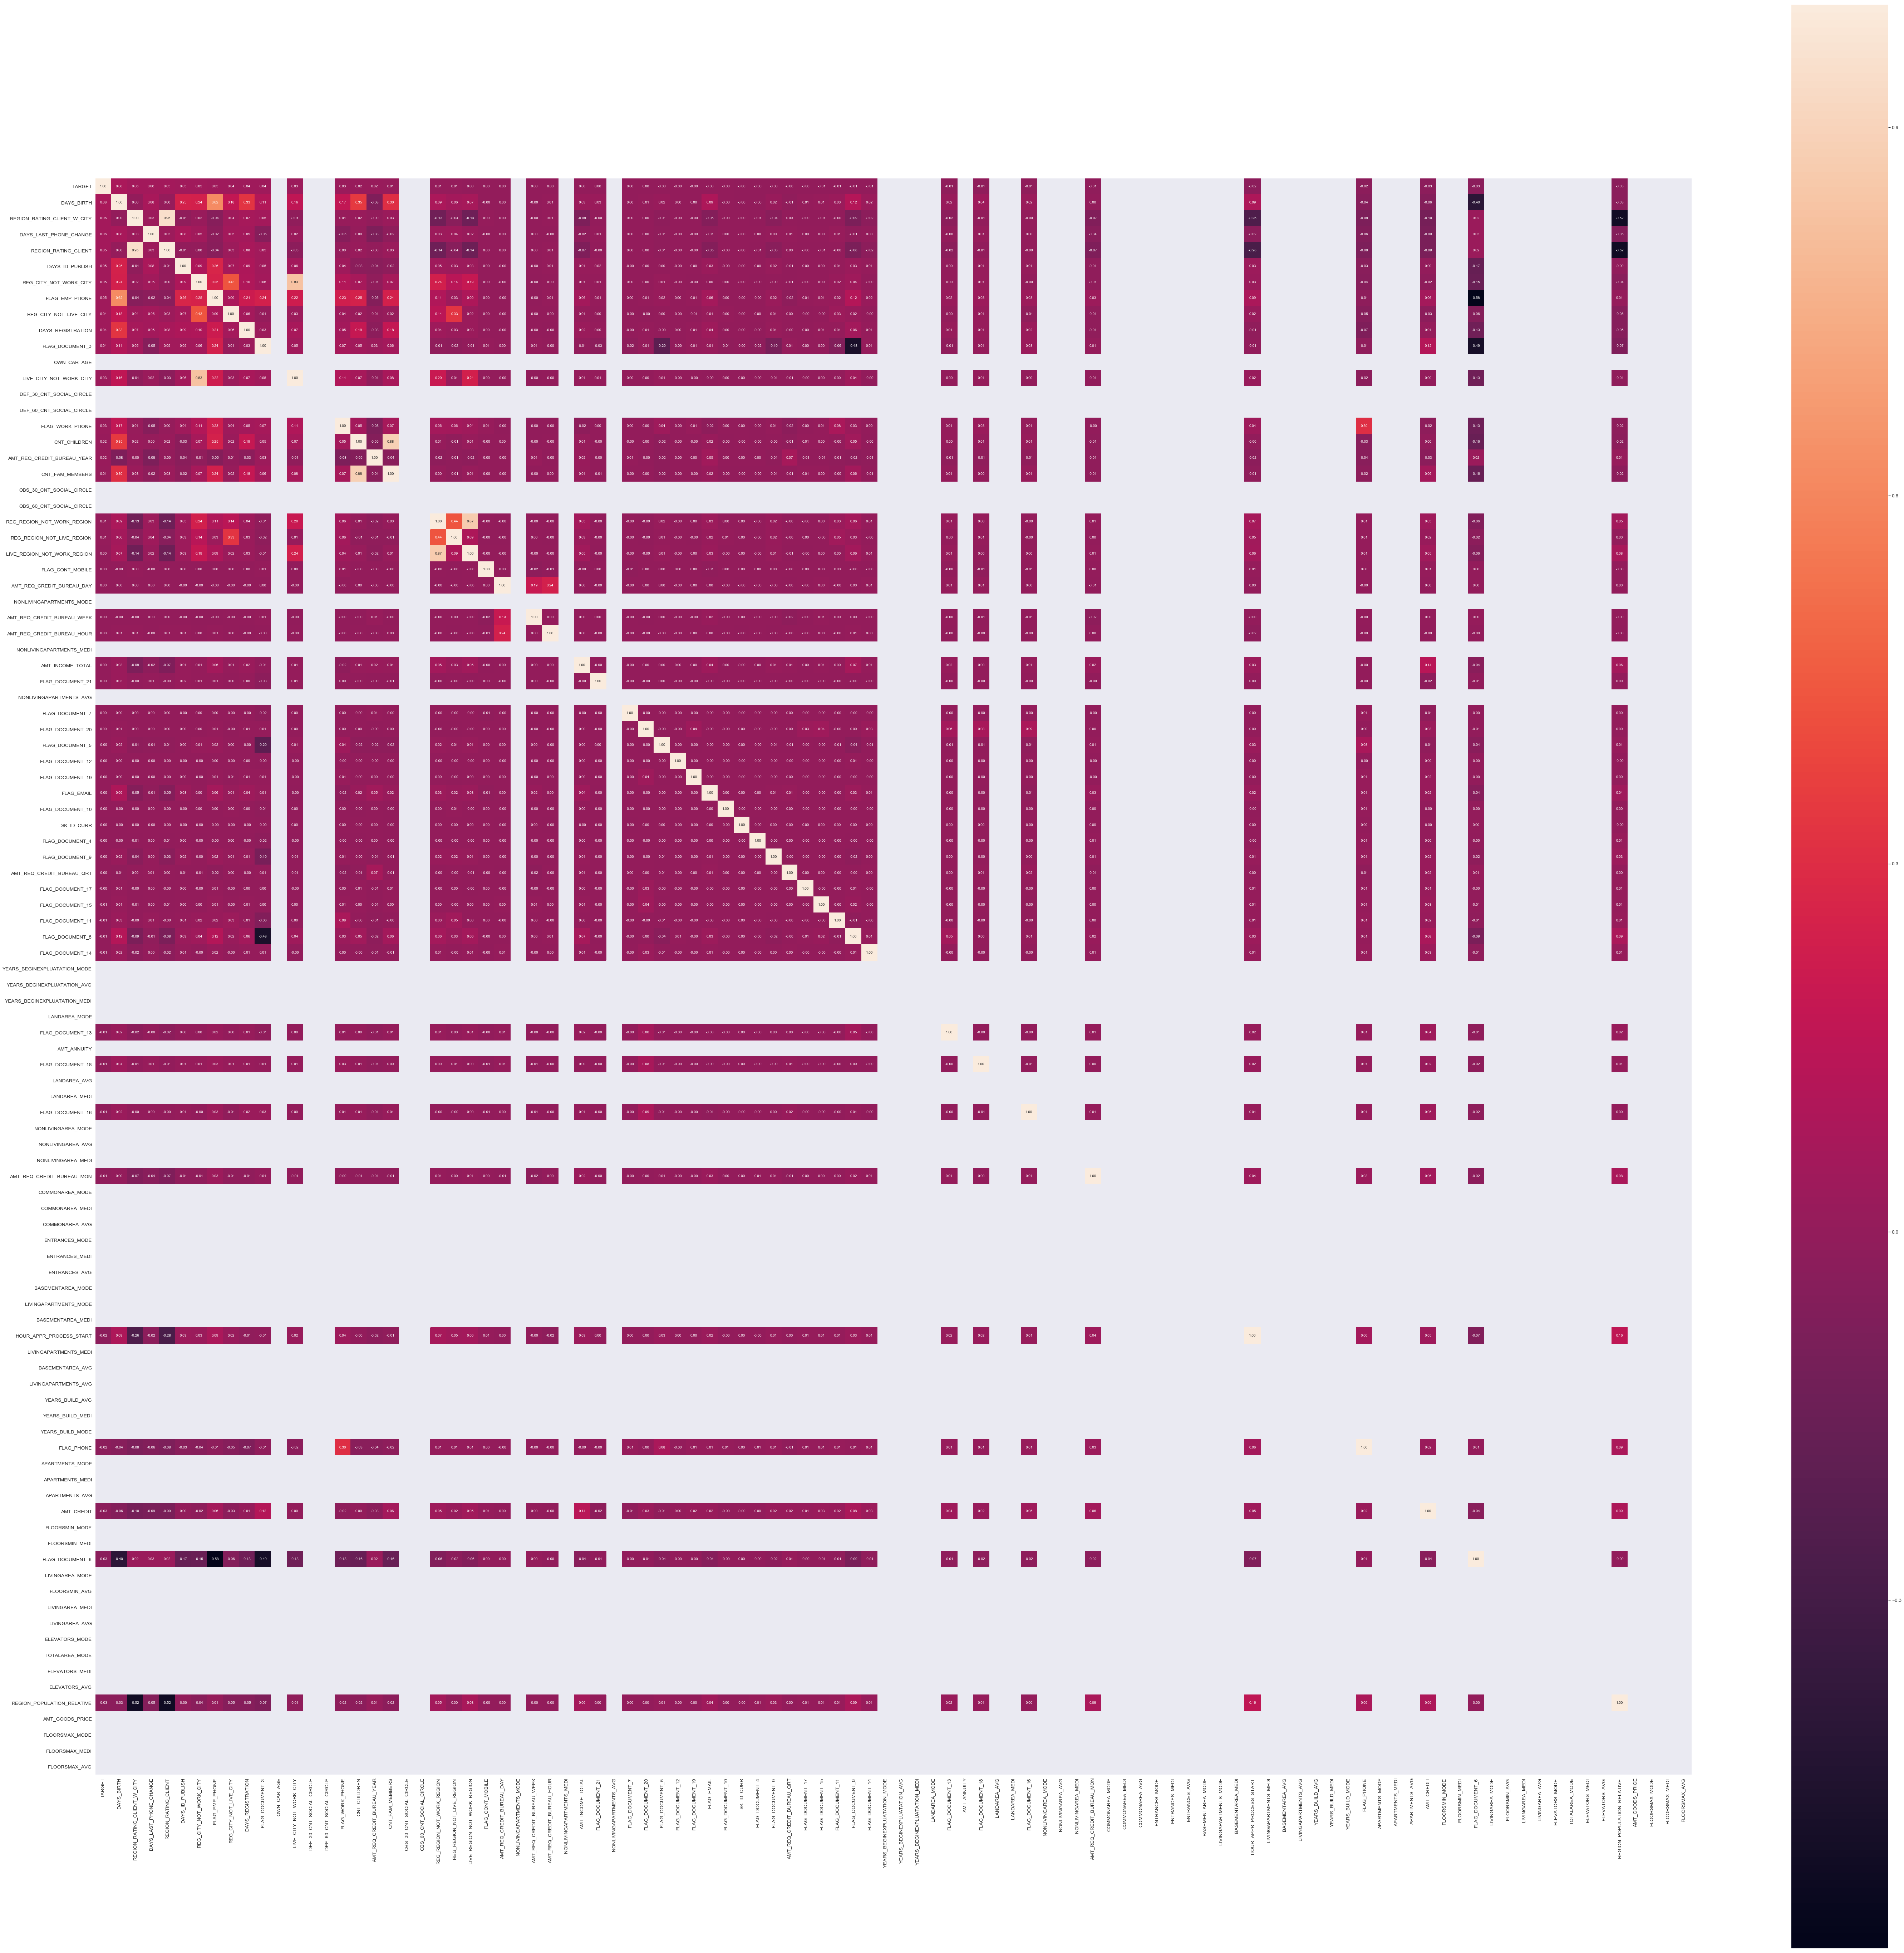

In [7]:
k = 100
cols = corrmat.nlargest(k, 'TARGET')['TARGET'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(100, 100))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [378]:
data_corr = data.copy()

In [379]:
data_corr = data_corr.drop(columns=['REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_6', 'FLAG_EMP_PHONE'])

In [380]:
data_corr.shape

(307511, 116)

# Handle missing values

In [381]:
missing_values = data_corr.isnull().sum().sort_values(ascending=False)
percent_data = (data_corr.isnull().sum() / data_corr.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_values, percent_data], axis=1, keys=['Total', 'Percent'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print('Missing data:\n', missing_data)

Missing data:
                                Total   Percent
COMMONAREA_MODE               214865  0.698723
COMMONAREA_MEDI               214865  0.698723
COMMONAREA_AVG                214865  0.698723
NONLIVINGAPARTMENTS_AVG       213514  0.694330
NONLIVINGAPARTMENTS_MEDI      213514  0.694330
NONLIVINGAPARTMENTS_MODE      213514  0.694330
FONDKAPREMONT_MODE            210295  0.683862
LIVINGAPARTMENTS_MEDI         210199  0.683550
LIVINGAPARTMENTS_MODE         210199  0.683550
LIVINGAPARTMENTS_AVG          210199  0.683550
FLOORSMIN_AVG                 208642  0.678486
FLOORSMIN_MEDI                208642  0.678486
FLOORSMIN_MODE                208642  0.678486
YEARS_BUILD_AVG               204488  0.664978
YEARS_BUILD_MEDI              204488  0.664978
YEARS_BUILD_MODE              204488  0.664978
OWN_CAR_AGE                   202929  0.659908
LANDAREA_MEDI                 182590  0.593767
LANDAREA_AVG                  182590  0.593767
LANDAREA_MODE                 182590  0.59376

In [382]:
data_miss = data_corr.copy()
data_miss = data_miss.drop(columns=['COMMONAREA_AVG', 'COMMONAREA_MODE',
                                    'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 
                                    'FONDKAPREMONT_MODE', 
                                    'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
                                    'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 
                                    'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG',
                                    'OWN_CAR_AGE', 'LANDAREA_AVG', 'LANDAREA_MODE',
                                    'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG',
                                    'ELEVATORS_AVG', 'ELEVATORS_MODE',
                                    'APARTMENTS_MODE', 'APARTMENTS_AVG',
                                    'ENTRANCES_AVG', 'ENTRANCES_MODE',
                                    'LIVINGAREA_MODE', 'LIVINGAREA_AVG',
                                    'HOUSETYPE_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE',
                                    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 
                                    'EMERGENCYSTATE_MODE', ])

In [383]:
data_fillna = data_miss.copy()
data_removed = data_miss.copy()

In [384]:
missing_values = data_miss.isnull().sum().sort_values(ascending=False)
percent_data = (data_miss.isnull().sum() / data_miss.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_values, percent_data], axis=1, keys=['Total', 'Percent'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print('Missing data:\n', missing_data)

Missing data:
                                Total   Percent
COMMONAREA_MEDI               214865  0.698723
NONLIVINGAPARTMENTS_MEDI      213514  0.694330
LIVINGAPARTMENTS_MEDI         210199  0.683550
FLOORSMIN_MEDI                208642  0.678486
YEARS_BUILD_MEDI              204488  0.664978
LANDAREA_MEDI                 182590  0.593767
BASEMENTAREA_MEDI             179943  0.585160
NONLIVINGAREA_MEDI            169682  0.551792
NONLIVINGAREA_AVG             169682  0.551792
NONLIVINGAREA_MODE            169682  0.551792
ELEVATORS_MEDI                163891  0.532960
WALLSMATERIAL_MODE            156341  0.508408
APARTMENTS_MEDI               156061  0.507497
ENTRANCES_MEDI                154828  0.503488
LIVINGAREA_MEDI               154350  0.501933
FLOORSMAX_MEDI                153020  0.497608
YEARS_BEGINEXPLUATATION_MEDI  150007  0.487810
TOTALAREA_MODE                148431  0.482685
OCCUPATION_TYPE                96391  0.313455
AMT_REQ_CREDIT_BUREAU_QRT      41519  0.13501

### Option 1 - drop all missing values

In [385]:
data_removed = data_removed.drop(columns=['COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MEDI', 
                                          'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'LANDAREA_MEDI', 'BASEMENTAREA_MEDI',
                                          'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
                                          'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'LIVINGAREA_MEDI',
                                          'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'OCCUPATION_TYPE'])

In [386]:
cols_r =['OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
         'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_TYPE_SUITE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 
        'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT',
        'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS']

for column in cols_r:
    data_removed[column] = data_removed[column].fillna(data_removed[column].mode()[0])

### Option 2 - cope with missing values

In [387]:
cols =['COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MEDI', 
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'LANDAREA_MEDI', 'BASEMENTAREA_MEDI',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'LIVINGAREA_MEDI',
       'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'OCCUPATION_TYPE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_TYPE_SUITE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY',
      'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT',
        'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS']

for column in cols:
    data_fillna[column] = data_fillna[column].fillna(data_fillna[column].mode()[0])

### Check missing values

In [388]:
data_removed.isnull().sum().values.sum()

0

In [389]:
data_fillna.isnull().sum().values.sum()

0

### Check target variable

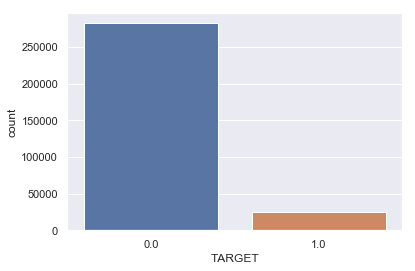

In [390]:
sns.countplot(data_removed['TARGET'], label='Sum')
plt.show()

# Handle outliers

### For data_removed

In [391]:
cols = data_removed.columns
num_cols = data_removed._get_numeric_data().columns
print(num_cols)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_

In [392]:
num_train = data_removed.select_dtypes(include=["number"])
cat_train = data_removed.select_dtypes(exclude=["number"])
num_train.shape

(307511, 56)

In [393]:
Q1 = num_train.quantile(0.05)
Q3 = num_train.quantile(0.95)
IQR = Q3 - Q1
idx = ~((num_train < (Q1 - 1.5 * IQR)) | (num_train > (Q3 + 1.5 * IQR))).any(axis=1)
data_removed = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)

In [394]:
data_removed.shape

(260157, 67)

### For data_fillna

In [395]:
cols = data_fillna.columns
num_cols = data_fillna._get_numeric_data().columns
print(num_cols)
num_train = data_fillna.select_dtypes(include=["number"])
cat_train = data_fillna.select_dtypes(exclude=["number"])
num_train.shape
Q1 = num_train.quantile(0.05)
Q3 = num_train.quantile(0.95)
IQR = Q3 - Q1
idx = ~((num_train < (Q1 - 1.5 * IQR)) | (num_train > (Q3 + 1.5 * IQR))).any(axis=1)
data_fillna = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)
data_fillna.shape

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'TOTALAREA_MODE', 'OBS_30_C

(246811, 86)

# Handle data types

In [396]:
data_removed['CNT_CHILDREN'] = data_removed['CNT_CHILDREN'].astype('int64')
data_removed['DAYS_ID_PUBLISH'] = data_removed['DAYS_ID_PUBLISH'].astype('int64')
data_removed['DAYS_EMPLOYED'] = data_removed['DAYS_EMPLOYED'].astype('int64')
data_removed['DAYS_BIRTH'] = data_removed['DAYS_BIRTH'].astype('int64')
data_removed['DAYS_REGISTRATION'] = data_removed['DAYS_REGISTRATION'].astype('int64')
data_removed['DAYS_LAST_PHONE_CHANGE'] = data_removed['DAYS_LAST_PHONE_CHANGE'].astype('int64')

In [397]:
data_removed['DAYS_ID_PUBLISH'] = abs(data_removed['DAYS_ID_PUBLISH'].values)
data_removed['DAYS_EMPLOYED'] = abs(data_removed['DAYS_EMPLOYED'].values)
data_removed['DAYS_BIRTH'] = abs(data_removed['DAYS_BIRTH'].values)
data_removed['DAYS_REGISTRATION'] = abs(data_removed['DAYS_REGISTRATION'].values)
data_removed['DAYS_LAST_PHONE_CHANGE'] = abs(data_removed['DAYS_LAST_PHONE_CHANGE'].values)

# Splitting dataset on targets and features

In [431]:
r_train_y = data_removed['TARGET']
r_train_x = data_removed.copy()
del r_train_x['TARGET']
del r_train_x['SK_ID_CURR']

In [432]:
f_train_y = data_fillna['TARGET']
f_train_x = data_fillna.copy()
del f_train_x['TARGET']

# Get dummies

In [433]:
x_removed_dum = pd.get_dummies(r_train_x)
x_removed_dum.shape

(260157, 159)

In [434]:
x_fillna_dum = pd.get_dummies(f_train_x)
x_fillna_dum.shape

(246811, 202)

# Normalization

In [435]:
scaler = MinMaxScaler()
x_removed_norm = scaler.fit_transform(x_removed_dum)

### Split data before balancing

In [436]:
x_train, x_test, y_train, y_test = train_test_split(x_removed_norm, r_train_y, test_size=0.3)

# Handle imbalance data

### Oversampling

In [437]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SMOTENC
from collections import Counter

# x_resampled, y_resampled = BorderlineSMOTE().fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
# x_resampled, y_resampled = smote_nc.fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

x_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)
print(sorted(Counter(y_resampled).items()))

# x_resampled, y_resampled = ADASYN().fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

[(0.0, 167268), (1.0, 167268)]


### Undersampling

In [405]:
# from imblearn.under_sampling import ClusterCentroids
# cc = ClusterCentroids(random_state=0)
# x_resampled, y_resampled = cc.fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)
# x_resampled, y_resampled = rus.fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# from imblearn.under_sampling import NearMiss
# nm1 = NearMiss(version=1)
# x_resampled, y_resampled = nm1.fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# from imblearn.under_sampling import EditedNearestNeighbours
# enn = EditedNearestNeighbours()
# x_resampled, y_resampled = enn.fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# from imblearn.under_sampling import RepeatedEditedNearestNeighbours
# renn = RepeatedEditedNearestNeighbours()
# x_resampled, y_resampled = renn.fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# from imblearn.under_sampling import AllKNN
# allknn = AllKNN()
# x_resampled, y_resampled = allknn.fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# from imblearn.under_sampling import CondensedNearestNeighbour
# cnn = CondensedNearestNeighbour(random_state=0)
# x_resampled, y_resampled = cnn.fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# from imblearn.under_sampling import OneSidedSelection
# oss = OneSidedSelection(random_state=0)
# x_resampled, y_resampled = oss.fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# from imblearn.under_sampling import NeighbourhoodCleaningRule
# ncr = NeighbourhoodCleaningRule()
# x_resampled, y_resampled = ncr.fit_resample(x_train, y_train)
# print(sorted(Counter(y_resampled).items()))

# Test datasets on example

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


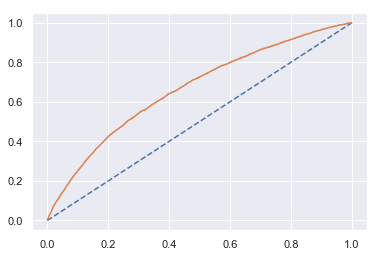

35.56707921028137 0.29221858978271487 0.6567864928716481 0.6569888987218391 0.6567864928716481 0.6566784742819156 0.7107959280904076
Balanced: 0.6205992322177774
AUC ROC: 0.6648547378232019
0.6676072573674918


In [424]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score,  roc_curve, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


lr = LogisticRegression()
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(lr, x_resampled, y_resampled, scoring=scoring, cv=5, n_jobs=-1)
# scores = cross_validate(lr, x_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
lr_fit_time = scores['fit_time'].mean()
lr_score_time = scores['score_time'].mean()
lr_accuracy = scores['test_accuracy'].mean()
lr_precision = scores['test_precision_macro'].mean()
lr_recall = scores['test_recall_macro'].mean()
lr_f1 = scores['test_f1_weighted'].mean()
lr_roc = scores['test_roc_auc'].mean()

lr.fit(x_resampled, y_resampled)
# lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
probs = lr.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(lr_fit_time, lr_score_time, lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc)
print('Balanced:', balanced_accuracy_score(y_test, y_pred))
print('AUC ROC:', auc)
print(np.mean([lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc]))

In [27]:
# Not-full dataset
# Logistic Regression
# Remove dataset: over_sampling; BorderlineSMOTE; Normalized; Balanced - 0.6224869941236959; AUC ROC - 0.6689262866227805 
# Remove dataset: over_sampling; SMOTENC; Normalized; Balanced - 0.5717518993575862; AUC ROC - 0.6385838295405608
# Remove dataset: over_sampling; SMOTE;   Normalized; Balanced - 0.6166696521827759; AUC ROC - 0.6598101528558757

# Entire dataset
# Logistic Regression
# Remove dataset: over_sampling; BorderlineSMOTE; Normalized; Balanced - ...; AUC ROC - 0.67
# Fillna dataset: over_sampling; BorderlineSMOTE; Normalized; Balanced - 0.6215630195718419; AUC ROC -  0.6673514810363779 
# Remove dataset:  Normalized; Balanced - 0.5000795418390073; AUC ROC - 0.6771862974813969
# Fillna dataset:  Normalized; Balanced - 0.5000676194751579; AUC ROC - 0.6764587297733253


# Select and Save Entire dataset + Removed

In [451]:
x_balanced_df = pd.DataFrame(data=x_resampled, columns=x_removed_dum.columns)
y_balanced_df = pd.DataFrame(data=y_resampled, columns=['TARGET'])

x_test_df = pd.DataFrame(data=x_test, columns=x_removed_dum.columns)
y_test_df = pd.DataFrame(data=y_test, columns=['TARGET'])

x_not_balanced_df = pd.DataFrame(data=x_train, columns=x_removed_dum.columns)
y_not_balanced_df = pd.DataFrame(data=y_train, columns=['TARGET'])

In [456]:
x_balanced_df.to_csv('data/data_for_model/x_train_balanced.csv', index=False)
y_balanced_df.to_csv('data/data_for_model/y_train_balanced.csv', index=False)

x_test_df.to_csv('data/data_for_model/x_test.csv', index=False)
y_test_df.to_csv('data/data_for_model/y_test.csv', index=False)

x_not_balanced_df.to_csv('data/data_for_model/x_train_not_balanced.csv', index=False)
y_not_balanced_df.to_csv('data/data_for_model/y_train_not_balanced.csv', index=False)